In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [90]:
#setup
include_transit = True
if include_transit:
    tag = 'with_transit'
else:
    tag='no_transit'
#Read in and create nested index
data_dir = 'C:\\Users\\bgerke.DOMINO0\\Desktop\\NHTS\\binned_dists\\'

In [91]:

dist_hists = pd.read_csv(data_dir+'dist_hists_by_region_'+tag+'.csv')
hourly_profiles = pd.read_csv(data_dir+'hourly_profiles_urb_rur_'+tag+'.csv')
dist_hists.set_index(['CDIVLS','URBRURS','WKTIME','MILEBIN'], inplace=True)
hourly_profiles.set_index(['URBRURS','WKTIME','MILEBIN','STRTHOUR'], inplace=True)

In [92]:
dist_hists

AVGDIST  COUNTSRAW     COUNTSWTD
CDIVLS URBRURS WKTIME   MILEBIN                                     
ENC    RUR     MO/FR    0-2        0.977429     2053.0  7.365273e+08
                        2-5        3.231085     1298.0  3.772505e+08
                        5-10       7.281436     1002.0  2.685436e+08
                        10-20     14.354197      879.0  2.740703e+08
                        20-30     24.290520      369.0  1.134880e+08
                        30-50     38.296500      294.0  7.924429e+07
                        50-100    65.612557      149.0  3.309224e+07
                        100-300  163.518387       75.0  1.288694e+07
               SA/SU    0-2        0.990881      904.0  5.914655e+08
                        2-5        3.264059      522.0  3.314264e+08
                        5-10       7.174956      363.0  2.181214e+08
                        10-20     13.877851      376.0  2.276380e+08
                        20-30     24.590622      135.0  9.867586e+07
                        30-50     39.451236      110.0  7.459379e+07
                        50-100    66.330979       96.0  4.167240e+07
                        100-300  154.722333       33.0  1.720882e+07
               TU/WE/TH 0-2        0.972198     3018.0  8.716086e+08
                        2-5        3.263572     1871.0  5.865779e+08
                        5-10       7.266915     1482.0  4.749664e+08
                        10-20     14.300158     1366.0  5.242017e+08
                        20-30     24.381568      562.0  1.770732e+08
                        30-50     38.323571      462.0  1.505918e+08
                        50-100    67.778822      180.0  4.419798e+07
                        100-300  156.786339       59.0  1.006733e+07
       URB     MO/FR    0-2        1.091301     5464.0  2.366709e+09
                        2-5        3.299593     5786.0  2.489039e+09
                        5-10       7.128054     3777.0  1.739570e+09
                        10-20     14.064110     2660.0  1.251727e+09
                        20-30     23.916630      841.0  4.605324e+08
                        30-50     37.600925      517.0  2.568254e+08
...                                     ...        ...           ...
WSC-TX RUR     TU/WE/TH 5-10       7.225261      752.0  1.262966e+08
                        10-20     14.060794      713.0  1.304878e+08
                        20-30     24.993852      284.0  4.874912e+07
                        30-50     38.525837      294.0  4.158224e+07
                        50-100    66.838243      173.0  2.906139e+07
                        100-300  177.377809       47.0  6.633365e+06
       URB     MO/FR    0-2        1.112937    11094.0  1.425143e+09
                        2-5        3.309249    11970.0  1.545101e+09
                        5-10       7.110423     7613.0  9.971863e+08
                        10-20     14.138933     6089.0  8.016910e+08
                        20-30     24.071358     2383.0  3.030889e+08
                        30-50     37.079675     1209.0  1.508032e+08
                        50-100    68.336914      418.0  4.922806e+07
                        100-300  170.215309      269.0  3.273075e+07
               SA/SU    0-2        1.100384     3874.0  1.180684e+09
                        2-5        3.305593     4304.0  1.286707e+09
                        5-10       7.117384     2691.0  8.256438e+08
                        10-20     14.155108     1856.0  5.653556e+08
                        20-30     24.023736      694.0  2.186641e+08
                        30-50     37.755050      377.0  1.106647e+08
                        50-100    70.928787      211.0  7.154093e+07
                        100-300  166.268325      163.0  5.521378e+07
               TU/WE/TH 0-2        1.116325    16044.0  2.101744e+09
                        2-5        3.297362    17538.0  2.286532e+09
                        5-10       7.128284    11989.0  1.622220e+09
                        10-20     

In [93]:
hourly_profiles

COUNTSRAW     COUNTSWTD   TRIPPCT
URBRURS WKTIME   MILEBIN STRTHOUR                                   
RUR     MO/FR    0-2     0               6.0  3.686144e+06  0.000966
                         1               8.0  9.804437e+06  0.002571
                         2               1.0  3.220029e+05  0.000084
                         3               1.0  4.899141e+06  0.001285
                         4              29.0  3.587461e+06  0.000941
                         5              88.0  3.292373e+07  0.008632
                         6             232.0  9.493033e+07  0.024890
                         7             680.0  2.988308e+08  0.078351
                         8             546.0  2.453281e+08  0.064323
                         9             709.0  2.261331e+08  0.059290
                         10            821.0  2.633558e+08  0.069050
                         11            984.0  3.151545e+08  0.082631
                         12            991.0  3.572513e+08  0.093669
                         13            808.0  2.912399e+08  0.076361
                         14            836.0  2.813010e+08  0.073755
                         15            922.0  3.729655e+08  0.097789
                         16            794.0  3.071244e+08  0.080526
                         17            609.0  2.514641e+08  0.065932
                         18            401.0  1.810242e+08  0.047463
                         19            220.0  9.051126e+07  0.023731
                         20            181.0  7.440041e+07  0.019507
                         21            106.0  5.901752e+07  0.015474
                         22             46.0  2.751623e+07  0.007215
                         23             29.0  2.121847e+07  0.005563
                 2-5     0               6.0  4.572063e+06  0.001941
                         1               4.0  1.554191e+06  0.000660
                         3               2.0  3.235058e+05  0.000137
                         4              32.0  1.362102e+07  0.005783
                         5              84.0  2.877349e+07  0.012215
                         6             233.0  1.046362e+08  0.044421
...                                      ...           ...       ...
URB     TU/WE/TH 50-100  17            178.0  6.594758e+07  0.071462
                         18            123.0  4.431550e+07  0.048021
                         19             74.0  1.524403e+07  0.016519
                         20             69.0  1.106856e+07  0.011994
                         21             38.0  5.375190e+06  0.005825
                         22             25.0  1.175407e+07  0.012737
                         23              9.0  3.767786e+06  0.004083
                 100-300 0               1.0  1.338488e+04  0.000037
                         1               2.0  2.409549e+05  0.000674
                         3               4.0  2.328788e+05  0.000652
                         4              48.0  1.608052e+07  0.045005
                         5              49.0  1.898431e+07  0.053132
                         6              94.0  2.389395e+07  0.066873
                         7             108.0  2.971208e+07  0.083156
                         8             110.0  2.159247e+07  0.060431
                         9             131.0  3.511721e+07  0.098283
                         10             98.0  1.848568e+07  0.051736
                         11            109.0  2.376506e+07  0.066512
                         12            137.0  3.388584e+07  0.094837
                         13             91.0  1.605296e+07  0.044928
                         14            123.0  1.958930e+07  0.054825
                         15            100.0  2.022665e+07  0.056609
                         16             94.0  2.570211e+07  0.071933
                         17             57.0  2.233748e+07  0.062516
                         18             49.0  1.526282e+07  0.042716
                         19      

In [94]:
hourly_profiles['TRIPPCT'].unstack('STRTHOUR').T.mul(\
                                            dist_hists.loc['ENC','COUNTSWTD']).fillna(0.).T.loc[dist_hists.loc['ENC'].index]

STRTHOUR                            0             1             2   \
URBRURS WKTIME   MILEBIN                                             
RUR     MO/FR    0-2      7.118388e+05  1.893355e+06  6.218262e+04   
                 2-5      7.322380e+05  2.489112e+05  0.000000e+00   
                 5-10     1.496770e+06  1.397469e+05  8.671463e+04   
                 10-20    1.590864e+06  6.842560e+04  8.579867e+04   
                 20-30    1.169090e+06  6.415990e+04  2.667856e+04   
                 30-50    9.267111e+04  1.706350e+05  1.388824e+04   
                 50-100   6.963952e+05  6.024538e+04  1.388401e+04   
                 100-300  7.363645e+04  0.000000e+00  0.000000e+00   
        SA/SU    0-2      1.569396e+06  5.796793e+04  4.563162e+05   
                 2-5      9.562455e+05  1.508814e+05  0.000000e+00   
                 5-10     2.110528e+05  1.826748e+05  3.479368e+03   
                 10-20    2.090629e+05  7.089879e+05  8.781711e+05   
                 20-30    0.000000e+00  4.392136e+04  0.000000e+00   
                 30-50    0.000000e+00  8.301703e+05  0.000000e+00   
                 50-100   2.047927e+04  1.555427e+05  0.000000e+00   
                 100-300  6.490344e+03  0.000000e+00  0.000000e+00   
        TU/WE/TH 0-2      1.691200e+06  5.171467e+05  3.161889e+05   
                 2-5      1.356237e+05  9.633479e+05  5.204293e+05   
                 5-10     1.032875e+06  2.218580e+04  2.287211e+05   
                 10-20    8.887568e+05  3.383345e+05  0.000000e+00   
                 20-30    3.997111e+05  8.180837e+03  4.343233e+05   
                 30-50    5.238564e+04  4.093873e+04  2.820119e+05   
                 50-100   0.000000e+00  1.037275e+05  0.000000e+00   
                 100-300  0.000000e+00  8.446881e+05  0.000000e+00   
URB     MO/FR    0-2      5.675185e+06  2.426299e+06  1.727350e+06   
                 2-5      5.579290e+06  3.565395e+06  9.004601e+05   
                 5-10     7.117633e+06  3.619588e+06  9.471688e+05   
                 10-20    3.111972e+06  1.661477e+06  4.024099e+06   
                 20-30    1.420604e+06  1.155364e+06  2.607436e+05   
                 30-50    3.918424e+05  1.812014e+06  6.931450e+05   
                 50-100   3.366546e+05  7.627073e+04  0.000000e+00   
                 100-300  3.315111e+04  0.000000e+00  0.000000e+00   
        SA/SU    0-2      1.940846e+06  5.526477e+06  5.680663e+05   
                 2-5      7.624194e+06  6.923290e+06  5.872274e+05   
                 5-10     8.298840e+06  3.042569e+06  1.693469e+06   
                 10-20    6.275540e+06  3.695502e+06  3.386366e+05   
                 20-30    1.218817e+06  1.086545e+06  1.216521e+05   
                 30-50    5.621940e+05  7.025900e+05  1.402393e+05   
                 50-100   3.309088e+05  2.455639e+05  1.927514e+05   
                 100-300  1.909365e+05  2.272266e+05  0.000000e+00   
        TU/WE/TH 0-2      3.689163e+06  2.197891e+06  1.228499e+06   
                 2-5      9.115763e+06  2.509248e+06  1.764522e+06   
                 5-10     6.779552e+06  4.643677e+06  3.153446e+06   
                 10-20    5.616313e+06  4.227078e+06  2.504624e+06   
                 20-30    2.089912e+06  1.174021e+06  7.323071e+05   
                 30-50    1.274205e+06  1.420425e+06  3.367532e+04   
                 50-100   2.662497e+05  2.466962e+05  1.115739e+05   
                 100-300  2.131954e+03  3.837948e+04  0.000000e+00   

STRTHOUR                            3             4             5   \
URBRURS WKTIME   MILEBIN                                             
RUR     MO/FR    0-2      9.460831e+05  6.927819e+05  6.357968e+06   
                 2-5      5.181101e+04  2.181472e+06  4.608214e+06   
                 5-10     1.547319e+05  2.979315e+06  3.396590e+06   
                 10-20    1.407593e+04  1.671303e+06  7.927602e+06   
                 20-30    2.210892e+05  1.552895e+06  2.566231e+06   
         

In [95]:
#Reshape and multiply together.
dist_hour_hists = dist_hists.copy()
dist_hour_hists.rename(columns={'COUNTSRAW':'NRAW', 'COUNTSWTD':'NWTD'},inplace=True)



#Create new columns for hourly trip counts
for h in range(24):
    dist_hour_hists[h]=0

for reg in dist_hists.index.levels[0]:
    dist_hour_hists.loc[reg,range(24)] = \
        hourly_profiles['TRIPPCT'].unstack('STRTHOUR').T.mul(\
                                            dist_hists.loc[reg,'COUNTSWTD']).fillna(0.).T.loc[dist_hists.loc[reg].index].values
        #The final reindexing by dist_hists.loc[reg].index is essential to get the rows in the right order!
        
#Get number of weekdays and correct to get number of trips per day.
nwkdays = pd.Series(dist_hour_hists.index.get_level_values('WKTIME'), index=dist_hour_hists.index).str.count('/')+1
dist_hour_hists[range(24)] = dist_hour_hists[range(24)].mul(7/nwkdays/365, axis='rows')

dist_hour_hists

AVGDIST     NRAW          NWTD  \
CDIVLS URBRURS WKTIME   MILEBIN                                      
ENC    RUR     MO/FR    0-2        0.977429   2053.0  7.365273e+08   
                        2-5        3.231085   1298.0  3.772505e+08   
                        5-10       7.281436   1002.0  2.685436e+08   
                        10-20     14.354197    879.0  2.740703e+08   
                        20-30     24.290520    369.0  1.134880e+08   
                        30-50     38.296500    294.0  7.924429e+07   
                        50-100    65.612557    149.0  3.309224e+07   
                        100-300  163.518387     75.0  1.288694e+07   
               SA/SU    0-2        0.990881    904.0  5.914655e+08   
                        2-5        3.264059    522.0  3.314264e+08   
                        5-10       7.174956    363.0  2.181214e+08   
                        10-20     13.877851    376.0  2.276380e+08   
                        20-30     24.590622    135.0  9.867586e+07   
                        30-50     39.451236    110.0  7.459379e+07   
                        50-100    66.330979     96.0  4.167240e+07   
                        100-300  154.722333     33.0  1.720882e+07   
               TU/WE/TH 0-2        0.972198   3018.0  8.716086e+08   
                        2-5        3.263572   1871.0  5.865779e+08   
                        5-10       7.266915   1482.0  4.749664e+08   
                        10-20     14.300158   1366.0  5.242017e+08   
                        20-30     24.381568    562.0  1.770732e+08   
                        30-50     38.323571    462.0  1.505918e+08   
                        50-100    67.778822    180.0  4.419798e+07   
                        100-300  156.786339     59.0  1.006733e+07   
       URB     MO/FR    0-2        1.091301   5464.0  2.366709e+09   
                        2-5        3.299593   5786.0  2.489039e+09   
                        5-10       7.128054   3777.0  1.739570e+09   
                        10-20     14.064110   2660.0  1.251727e+09   
                        20-30     23.916630    841.0  4.605324e+08   
                        30-50     37.600925    517.0  2.568254e+08   
...                                     ...      ...           ...   
WSC-TX RUR     TU/WE/TH 5-10       7.225261    752.0  1.262966e+08   
                        10-20     14.060794    713.0  1.304878e+08   
                        20-30     24.993852    284.0  4.874912e+07   
                        30-50     38.525837    294.0  4.158224e+07   
                        50-100    66.838243    173.0  2.906139e+07   
                        100-300  177.377809     47.0  6.633365e+06   
       URB     MO/FR    0-2        1.112937  11094.0  1.425143e+09   
                        2-5        3.309249  11970.0  1.545101e+09   
                        5-10       7.110423   7613.0  9.971863e+08   
                        10-20     14.138933   6089.0  8.016910e+08   
                        20-30     24.071358   2383.0  3.030889e+08   
                        30-50     37.079675   1209.0  1.508032e+08   
                        50-100    68.336914    418.0  4.922806e+07   
                        100-300  170.215309    269.0  3.273075e+07   
               SA/SU    0-2        1.100384   3874.0  1.180684e+09   
                        2-5        3.305593   4304.0  1.286707e+09   
                        5-10       7.117384   2691.0  8.256438e+08   
                        10-20     14.155108   1856.0  5.653556e+08   
                        20-30     24.023736    694.0  2.186641e+08   
                        30-50     37.755050    377.0  1.106647e+08   
                        50-100    70.928787    211.0  7.154093e+07   
                        100-300  166.268325    163.0  5.521378e+07   
               TU/WE/TH 0-2        1.116325  16044.0  2.101744e+09   
                        2-5        3.297362  17538.0  2.286532e+09   
                        5-10       7.128284  1

In [96]:
#If you want to write this out to CSV, uncomment and modify the below.
#BUT make sure to see below for example usage!
dist_hour_hists.to_csv(data_dir+'dist_hour_hists_year_'+tag+'.csv')

In [97]:
#Check average miles (should be ~9)
dist_hour_hists[range(24)].mul(dist_hour_hists['AVGDIST'], axis=0).sum(axis=1).sum()/dist_hour_hists[range(24)].sum(axis=1).sum()

8.971165384326351

In [98]:
#list the regions
dist_hour_hists.index.levels[0].unique()


Index([u'ENC', u'ESC', u'MAT-NL', u'MAT-NY', u'MTN', u'NENG', u'PAC-CA',
       u'PAC-NL', u'SAT-FL', u'SAT-NL', u'WNC', u'WSC-NL', u'WSC-TX'],
      dtype='object', name=u'CDIVLS')

<IPython.core.display.Javascript object>


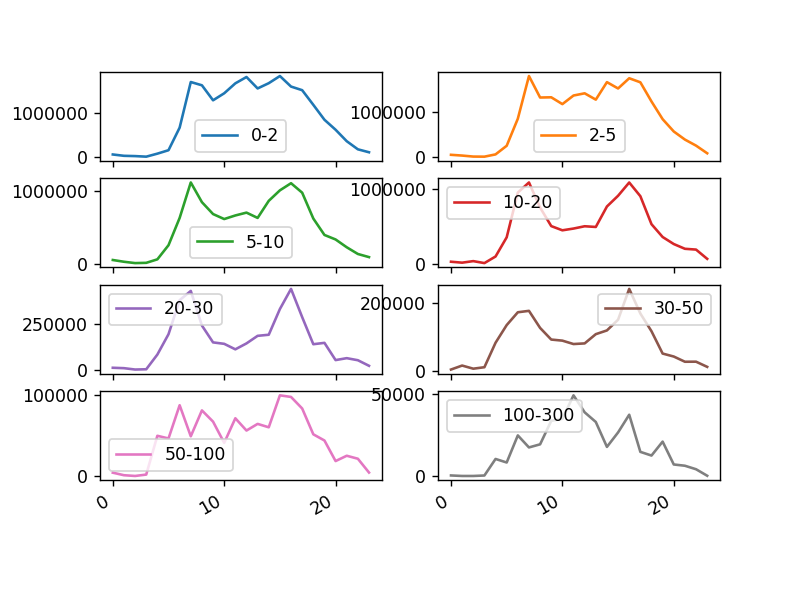

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D652828>,
      dtype=object)

In [99]:
#Plot an example region

#First, must downsample to an average day from the NHTS annualized trip weights:
weektime = 'MO/FR'
#weektime = 'TU/WE/TH'
#weektime = 'SA/SU'

ndays = weektime.count('/')+1.
#ann2daily = 7/ndays/365.
#if weektime == 'WEEKDAY':
#    ann2daily = 7/5/365. #Number of weekdays in year
#elif weektime == 'WEEKEND':
#    ann2daily = 7/2/365. #Number of weekend days in the year 
#else:
#    raise ValueError('weektime must be either "WEEKDAY" or "WEEKEND"')
    
dist_hour_hists.loc[('PAC-CA','URB',weektime), range(24)].T.plot(subplots=True,layout=[4,2])

In [100]:
seas_scl = pd.read_csv(data_dir+'seasonal_scaling_'+tag+'.csv')
seas_scl.set_index(['SEASON','URBRURS','MILEBIN'], inplace=True)
seas_scl

COUNTSRAW     COUNTSWTD    DAILYTRIPS  \
SEASON  URBRURS MILEBIN                                          
DEC-FEB RUR     0-2         8349.0  2.718310e+09  3.020344e+07   
                2-5         5465.0  1.737677e+09  1.930752e+07   
                5-10        4011.0  1.230154e+09  1.366838e+07   
                10-20       3101.0  1.046188e+09  1.162431e+07   
                20-30       1236.0  4.373098e+08  4.858997e+06   
                30-50       1025.0  3.687831e+08  4.097590e+06   
                50-100       601.0  2.392821e+08  2.658691e+06   
                100-300      217.0  6.579422e+07  7.310469e+05   
        URB     0-2        39679.0  1.323470e+10  1.470522e+08   
                2-5        41599.0  1.422500e+10  1.580555e+08   
                5-10       27784.0  9.281289e+09  1.031254e+08   
                10-20      19335.0  6.649068e+09  7.387854e+07   
                20-30       6686.0  2.325181e+09  2.583534e+07   
                30-50       3775.0  1.243500e+09  1.381667e+07   
                50-100      1692.0  4.899189e+08  5.443544e+06   
                100-300      843.0  2.416200e+08  2.684667e+06   
JUN-AUG RUR     0-2         8207.0  3.114815e+09  3.385669e+07   
                2-5         5629.0  1.982654e+09  2.155058e+07   
                5-10        4052.0  1.434327e+09  1.559051e+07   
                10-20       3291.0  1.156125e+09  1.256658e+07   
                20-30       1286.0  4.810618e+08  5.228933e+06   
                30-50       1068.0  3.786120e+08  4.115348e+06   
                50-100       638.0  2.281452e+08  2.479839e+06   
                100-300      260.0  8.388049e+07  9.117444e+05   
        URB     0-2        39073.0  1.397261e+10  1.518762e+08   
                2-5        41168.0  1.510838e+10  1.642215e+08   
                5-10       27762.0  1.027797e+10  1.117171e+08   
                10-20      19893.0  7.564697e+09  8.222497e+07   
                20-30       6691.0  2.676816e+09  2.909582e+07   
                30-50       4045.0  1.460807e+09  1.587834e+07   
...                            ...           ...           ...   
MAR-MAY RUR     5-10        3413.0  1.359305e+09  1.477506e+07   
                10-20       2811.0  1.226626e+09  1.333290e+07   
                20-30       1060.0  4.508438e+08  4.900476e+06   
                30-50        827.0  3.090515e+08  3.359256e+06   
                50-100       469.0  2.169427e+08  2.358073e+06   
                100-300      176.0  1.024630e+08  1.113729e+06   
        URB     0-2        30990.0  1.458939e+10  1.585803e+08   
                2-5        33114.0  1.613914e+10  1.754255e+08   
                5-10       22148.0  1.083011e+10  1.177186e+08   
                10-20      15921.0  8.048851e+09  8.748751e+07   
                20-30       5272.0  2.650450e+09  2.880924e+07   
                30-50       2977.0  1.402099e+09  1.524021e+07   
                50-100      1501.0  6.070087e+08  6.597920e+06   
                100-300      702.0  2.854359e+08  3.102564e+06   
SEP-NOV RUR     0-2         8287.0  2.688441e+09  2.922219e+07   
                2-5         5898.0  1.965764e+09  2.136700e+07   
                5-10        4341.0  1.346520e+09  1.463609e+07   
                10-20       3330.0  1.127545e+09  1.225592e+07   
                20-30       1258.0  4.516745e+08  4.909506e+06   
                30-50       1080.0  3.689270e+08  4.010076e+06   
                50-100       637.0  2.005986e+08  2.180419e+06   
                100-300      275.0  8.084345e+07  8.787331e+05   
        URB     0-2        39909.0  1.353994e+10  1.471733e+08   
                2-5        42517.0  1.438335e+10  1.563407e+08   
                5-10       28254.0  9.769377e+09  1.061889e+08   
                10-20      20397.0  6.906576e+09  7.507148e+07   
                20-30       6905.0  2.568136e+09  2.791452e+07   
                30-50       4062.0  1.448337e+09  1.574280e+07   

In [101]:
for s in seas_scl.index.get_level_values('SEASON').unique():
    print s
    print seas_scl.loc[s,'TRIPSCALESEASON']

DEC-FEB
URBRURS  MILEBIN
RUR      0-2        0.947198
         2-5        0.936207
         5-10       0.928989
         10-20      0.931173
         20-30      0.973993
         30-50      1.049283
         50-100     1.096561
         100-300    0.801343
URB      0-2        0.969955
         2-5        0.963820
         5-10       0.937300
         10-20      0.924457
         20-30      0.922638
         30-50      0.907888
         50-100     0.823918
         100-300    0.799339
Name: TRIPSCALESEASON, dtype: float64
JUN-AUG
URBRURS  MILEBIN
RUR      0-2        1.061766
         2-5        1.044971
         5-10       1.059630
         10-20      1.006654
         20-30      1.048147
         30-50      1.053830
         50-100     1.022795
         100-300    0.999416
URB      0-2        1.001774
         2-5        1.001420
         5-10       1.015389
         10-20      1.028898
         20-30      1.039077
         30-50      1.043359
         50-100     1.086068
         100-

In [102]:
dist_hour_hists.reorder_levels(['URBRURS','MILEBIN','CDIVLS','WKTIME'], axis='index')

AVGDIST     NRAW          NWTD  \
URBRURS MILEBIN CDIVLS WKTIME                                        
RUR     0-2     ENC    MO/FR       0.977429   2053.0  7.365273e+08   
        2-5     ENC    MO/FR       3.231085   1298.0  3.772505e+08   
        5-10    ENC    MO/FR       7.281436   1002.0  2.685436e+08   
        10-20   ENC    MO/FR      14.354197    879.0  2.740703e+08   
        20-30   ENC    MO/FR      24.290520    369.0  1.134880e+08   
        30-50   ENC    MO/FR      38.296500    294.0  7.924429e+07   
        50-100  ENC    MO/FR      65.612557    149.0  3.309224e+07   
        100-300 ENC    MO/FR     163.518387     75.0  1.288694e+07   
        0-2     ENC    SA/SU       0.990881    904.0  5.914655e+08   
        2-5     ENC    SA/SU       3.264059    522.0  3.314264e+08   
        5-10    ENC    SA/SU       7.174956    363.0  2.181214e+08   
        10-20   ENC    SA/SU      13.877851    376.0  2.276380e+08   
        20-30   ENC    SA/SU      24.590622    135.0  9.867586e+07   
        30-50   ENC    SA/SU      39.451236    110.0  7.459379e+07   
        50-100  ENC    SA/SU      66.330979     96.0  4.167240e+07   
        100-300 ENC    SA/SU     154.722333     33.0  1.720882e+07   
        0-2     ENC    TU/WE/TH    0.972198   3018.0  8.716086e+08   
        2-5     ENC    TU/WE/TH    3.263572   1871.0  5.865779e+08   
        5-10    ENC    TU/WE/TH    7.266915   1482.0  4.749664e+08   
        10-20   ENC    TU/WE/TH   14.300158   1366.0  5.242017e+08   
        20-30   ENC    TU/WE/TH   24.381568    562.0  1.770732e+08   
        30-50   ENC    TU/WE/TH   38.323571    462.0  1.505918e+08   
        50-100  ENC    TU/WE/TH   67.778822    180.0  4.419798e+07   
        100-300 ENC    TU/WE/TH  156.786339     59.0  1.006733e+07   
URB     0-2     ENC    MO/FR       1.091301   5464.0  2.366709e+09   
        2-5     ENC    MO/FR       3.299593   5786.0  2.489039e+09   
        5-10    ENC    MO/FR       7.128054   3777.0  1.739570e+09   
        10-20   ENC    MO/FR      14.064110   2660.0  1.251727e+09   
        20-30   ENC    MO/FR      23.916630    841.0  4.605324e+08   
        30-50   ENC    MO/FR      37.600925    517.0  2.568254e+08   
...                                     ...      ...           ...   
RUR     5-10    WSC-TX TU/WE/TH    7.225261    752.0  1.262966e+08   
        10-20   WSC-TX TU/WE/TH   14.060794    713.0  1.304878e+08   
        20-30   WSC-TX TU/WE/TH   24.993852    284.0  4.874912e+07   
        30-50   WSC-TX TU/WE/TH   38.525837    294.0  4.158224e+07   
        50-100  WSC-TX TU/WE/TH   66.838243    173.0  2.906139e+07   
        100-300 WSC-TX TU/WE/TH  177.377809     47.0  6.633365e+06   
URB     0-2     WSC-TX MO/FR       1.112937  11094.0  1.425143e+09   
        2-5     WSC-TX MO/FR       3.309249  11970.0  1.545101e+09   
        5-10    WSC-TX MO/FR       7.110423   7613.0  9.971863e+08   
        10-20   WSC-TX MO/FR      14.138933   6089.0  8.016910e+08   
        20-30   WSC-TX MO/FR      24.071358   2383.0  3.030889e+08   
        30-50   WSC-TX MO/FR      37.079675   1209.0  1.508032e+08   
        50-100  WSC-TX MO/FR      68.336914    418.0  4.922806e+07   
        100-300 WSC-TX MO/FR     170.215309    269.0  3.273075e+07   
        0-2     WSC-TX SA/SU       1.100384   3874.0  1.180684e+09   
        2-5     WSC-TX SA/SU       3.305593   4304.0  1.286707e+09   
        5-10    WSC-TX SA/SU       7.117384   2691.0  8.256438e+08   
        10-20   WSC-TX SA/SU      14.155108   1856.0  5.653556e+08   
        20-30   WSC-TX SA/SU      24.023736    694.0  2.186641e+08   
        30-50   WSC-TX SA/SU      37.755050    377.0  1.106647e+08   
        50-100  WSC-TX SA/SU      70.928787    211.0  7.154093e+07   
        100-300 WSC-TX SA/SU     166.268325    163.0  5.521378e+07   
        0-2     WSC-TX TU/WE/TH    1.116325  16044.0  2.101744e+09   
        2-5     WSC-TX TU/WE/TH    3.297362  17538.0  2.286532e+09   
        5-10    WSC-TX TU/WE/TH    7.128284  1

In [103]:
seas_scl.loc[('DEC-FEB','URB','0-2'), 'TRIPSCALESEASON']

0.9699551734351372

In [104]:

for seas in seas_scl.index.get_level_values('SEASON').unique():
    dist_hour_hists_seas = dist_hour_hists.copy()
    for i, r in dist_hour_hists.iterrows():
        dist_hour_hists_seas.loc[i, range(24)] *= seas_scl.loc[(seas,i[1],i[3]),'TRIPSCALESEASON']
        
    dist_hour_hists_seas.to_csv((data_dir+'dist_hour_hists_'+seas.lower()+'_'+tag+'.csv'))
dist_hour_hists_seas

AVGDIST     NRAW          NWTD  \
CDIVLS URBRURS WKTIME   MILEBIN                                      
ENC    RUR     MO/FR    0-2        0.977429   2053.0  7.365273e+08   
                        2-5        3.231085   1298.0  3.772505e+08   
                        5-10       7.281436   1002.0  2.685436e+08   
                        10-20     14.354197    879.0  2.740703e+08   
                        20-30     24.290520    369.0  1.134880e+08   
                        30-50     38.296500    294.0  7.924429e+07   
                        50-100    65.612557    149.0  3.309224e+07   
                        100-300  163.518387     75.0  1.288694e+07   
               SA/SU    0-2        0.990881    904.0  5.914655e+08   
                        2-5        3.264059    522.0  3.314264e+08   
                        5-10       7.174956    363.0  2.181214e+08   
                        10-20     13.877851    376.0  2.276380e+08   
                        20-30     24.590622    135.0  9.867586e+07   
                        30-50     39.451236    110.0  7.459379e+07   
                        50-100    66.330979     96.0  4.167240e+07   
                        100-300  154.722333     33.0  1.720882e+07   
               TU/WE/TH 0-2        0.972198   3018.0  8.716086e+08   
                        2-5        3.263572   1871.0  5.865779e+08   
                        5-10       7.266915   1482.0  4.749664e+08   
                        10-20     14.300158   1366.0  5.242017e+08   
                        20-30     24.381568    562.0  1.770732e+08   
                        30-50     38.323571    462.0  1.505918e+08   
                        50-100    67.778822    180.0  4.419798e+07   
                        100-300  156.786339     59.0  1.006733e+07   
       URB     MO/FR    0-2        1.091301   5464.0  2.366709e+09   
                        2-5        3.299593   5786.0  2.489039e+09   
                        5-10       7.128054   3777.0  1.739570e+09   
                        10-20     14.064110   2660.0  1.251727e+09   
                        20-30     23.916630    841.0  4.605324e+08   
                        30-50     37.600925    517.0  2.568254e+08   
...                                     ...      ...           ...   
WSC-TX RUR     TU/WE/TH 5-10       7.225261    752.0  1.262966e+08   
                        10-20     14.060794    713.0  1.304878e+08   
                        20-30     24.993852    284.0  4.874912e+07   
                        30-50     38.525837    294.0  4.158224e+07   
                        50-100    66.838243    173.0  2.906139e+07   
                        100-300  177.377809     47.0  6.633365e+06   
       URB     MO/FR    0-2        1.112937  11094.0  1.425143e+09   
                        2-5        3.309249  11970.0  1.545101e+09   
                        5-10       7.110423   7613.0  9.971863e+08   
                        10-20     14.138933   6089.0  8.016910e+08   
                        20-30     24.071358   2383.0  3.030889e+08   
                        30-50     37.079675   1209.0  1.508032e+08   
                        50-100    68.336914    418.0  4.922806e+07   
                        100-300  170.215309    269.0  3.273075e+07   
               SA/SU    0-2        1.100384   3874.0  1.180684e+09   
                        2-5        3.305593   4304.0  1.286707e+09   
                        5-10       7.117384   2691.0  8.256438e+08   
                        10-20     14.155108   1856.0  5.653556e+08   
                        20-30     24.023736    694.0  2.186641e+08   
                        30-50     37.755050    377.0  1.106647e+08   
                        50-100    70.928787    211.0  7.154093e+07   
                        100-300  166.268325    163.0  5.521378e+07   
               TU/WE/TH 0-2        1.116325  16044.0  2.101744e+09   
                        2-5        3.297362  17538.0  2.286532e+09   
                        5-10       7.128284  1